## **Import Libraries**

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/used-car-price-prediction-dataset/used_cars.csv
/kaggle/input/playground-series-s4e9/sample_submission.csv
/kaggle/input/playground-series-s4e9/train.csv
/kaggle/input/playground-series-s4e9/test.csv


## **Load Data**

In [2]:
Train = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
Test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')
Original = pd.read_csv('/kaggle/input/used-car-price-prediction-dataset/used_cars.csv')


## **Understand Data**

In [3]:
print('Shape of Train data is: ', Train.shape)
print('Shape of Test data is: ', Test.shape)
print('Shape of Original data is:', Original.shape)

Shape of Train data is:  (188533, 13)
Shape of Test data is:  (125690, 12)
Shape of Original data is: (4009, 12)


In [4]:
Train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [5]:
Test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [6]:
Train = Train.drop(['id'] , axis=1)
print('Shape of Train data is: ', Train.shape)

Test = Test.drop(['id'] , axis=1)
print('Shape of Train data is: ', Test.shape)

Shape of Train data is:  (188533, 12)
Shape of Train data is:  (125690, 11)


In [7]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


In [8]:
Original.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [9]:
Original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [10]:
Original['price'] = pd.to_numeric(Original['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')
Original['milage'] = pd.to_numeric(Original['milage'].str.replace('mi.', '').str.replace(',', ''), errors='coerce')


In [11]:
Original.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598


In [12]:
Train_Original = pd.concat([Train, Original], ignore_index=True)
print('Shape of Train_Original is: ' , Train_Original.shape)

Shape of Train_Original is:  (192542, 12)


In [13]:
Train_Original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192542 entries, 0 to 192541
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         192542 non-null  object
 1   model         192542 non-null  object
 2   model_year    192542 non-null  int64 
 3   milage        192542 non-null  int64 
 4   fuel_type     187289 non-null  object
 5   engine        192542 non-null  object
 6   transmission  192542 non-null  object
 7   ext_col       192542 non-null  object
 8   int_col       192542 non-null  object
 9   accident      189977 non-null  object
 10  clean_title   170527 non-null  object
 11  price         192542 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.6+ MB


In [14]:
Train_Original[['model_year','milage', 'price']].describe().T

,count,mean,std,min,25%,50%,75%,max
model_year,192542.0,2015.823452,5.670724,1974.0,2013.0,2017.0,2020.0,2024.0
milage,192542.0,65684.728927,49851.512980,100.0,24115.0,57550.0,95400.0,405000.0
price,192542.0,43892.074270,78817.111436,2000.0,17000.0,30825.0,49900.0,2954083.0


In [ ]:
df_numerical = df.drop()

In [30]:
#Identify columns with numerical and non-numerical data
Cat_Features = Train_Original.select_dtypes(include=['object']).columns
Numeric_Feature = Train_Original.select_dtypes(exclude=['object']).columns


In [31]:
Train_Original[Numeric_Feature].corr()


,model_year,milage,price
model_year,1.000000,-0.582044,0.663119
milage,-0.582044,1.000000,-0.636581
price,0.663119,-0.636581,1.000000


<Axes: >

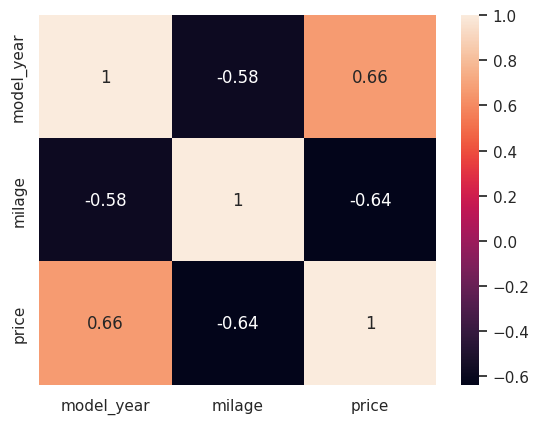

In [32]:
sns.heatmap(Train_Original[Numeric_Feature].corr(),annot= True)

In [15]:
Train_Original.describe(include=object).T

,count,unique,top,freq
brand,192542,57,Ford,23474
model,192542,1898,F-150 XLT,2969
fuel_type,187289,7,Gasoline,169249
engine,192542,1146,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,3510
transmission,192542,62,A/T,50941
ext_col,192542,319,Black,49563
int_col,192542,156,Black,109699
accident,189977,2,None reported,147424
clean_title,170527,1,Yes,170527


## **Feature Analysis**

## **Duplicate Handling**

In [16]:
Train_Original.duplicated().sum()

0

In [17]:
Test.duplicated().sum()

0

## **Null Handling**

In [18]:
Train_Original.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5253
engine              0
transmission        0
ext_col             0
int_col             0
accident         2565
clean_title     22015
price               0
dtype: int64

In [19]:
Test.isna().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [20]:
def Fill_Missing_Values(df, columns):
    df.fillna({col: df[col].mode()[0] for col in columns if col in df.columns}, inplace=True)

Columns_to_Fill = ['fuel_type', 'accident', 'clean_title']
Fill_Missing_Values(Train_Original, Columns_to_Fill)
Fill_Missing_Values(Test, Columns_to_Fill)

def Report_Missing_Values(df):
    Missing = df.isnull().sum()
    Missing = Missing[Missing > 0]
    
    if not Missing.empty:
        print(f"Columns with missing values:\n{missing}\n")
    else:
        print("No missing values detected.")

print("Missing values in the Training set:")
Report_Missing_Values(Train_Original)

print("\nMissing values in the Test set:")
Report_Missing_Values(Test)


Missing values in the Training set:
No missing values detected.

Missing values in the Test set:
No missing values detected.


# **Data Visualization**

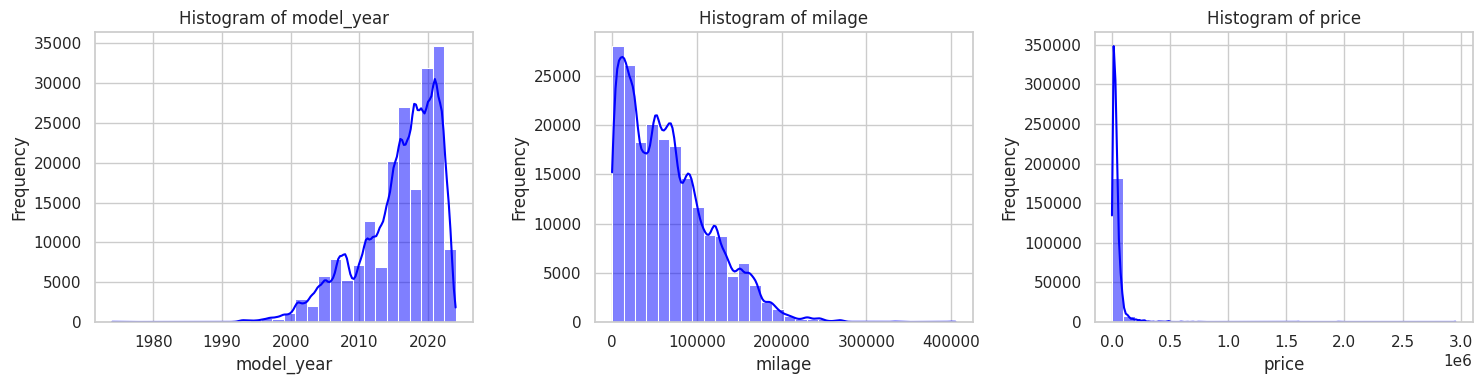

In [21]:
#Plotting Histograms for Numerical Columns

sns.set(style="whitegrid")

def Plot_Numerical_Data(df):
    Numerical_Col = df.select_dtypes(include=['int64']).columns
    Num_Columns = len(Numerical_Col)
    fig, axes = plt.subplots(1, Num_Columns, figsize=(5*Num_Columns, 4))   
    if Num_Columns == 1:
        axes = [axes]
    for ax, col in zip(axes, Numerical_Col):
        sns.histplot(df[col], kde=True, bins=30, color='blue', ax=ax)
        ax.set_title(f'Histogram of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

    plt.tight_layout()   
    plt.show()

Plot_Numerical_Data(Train_Original)


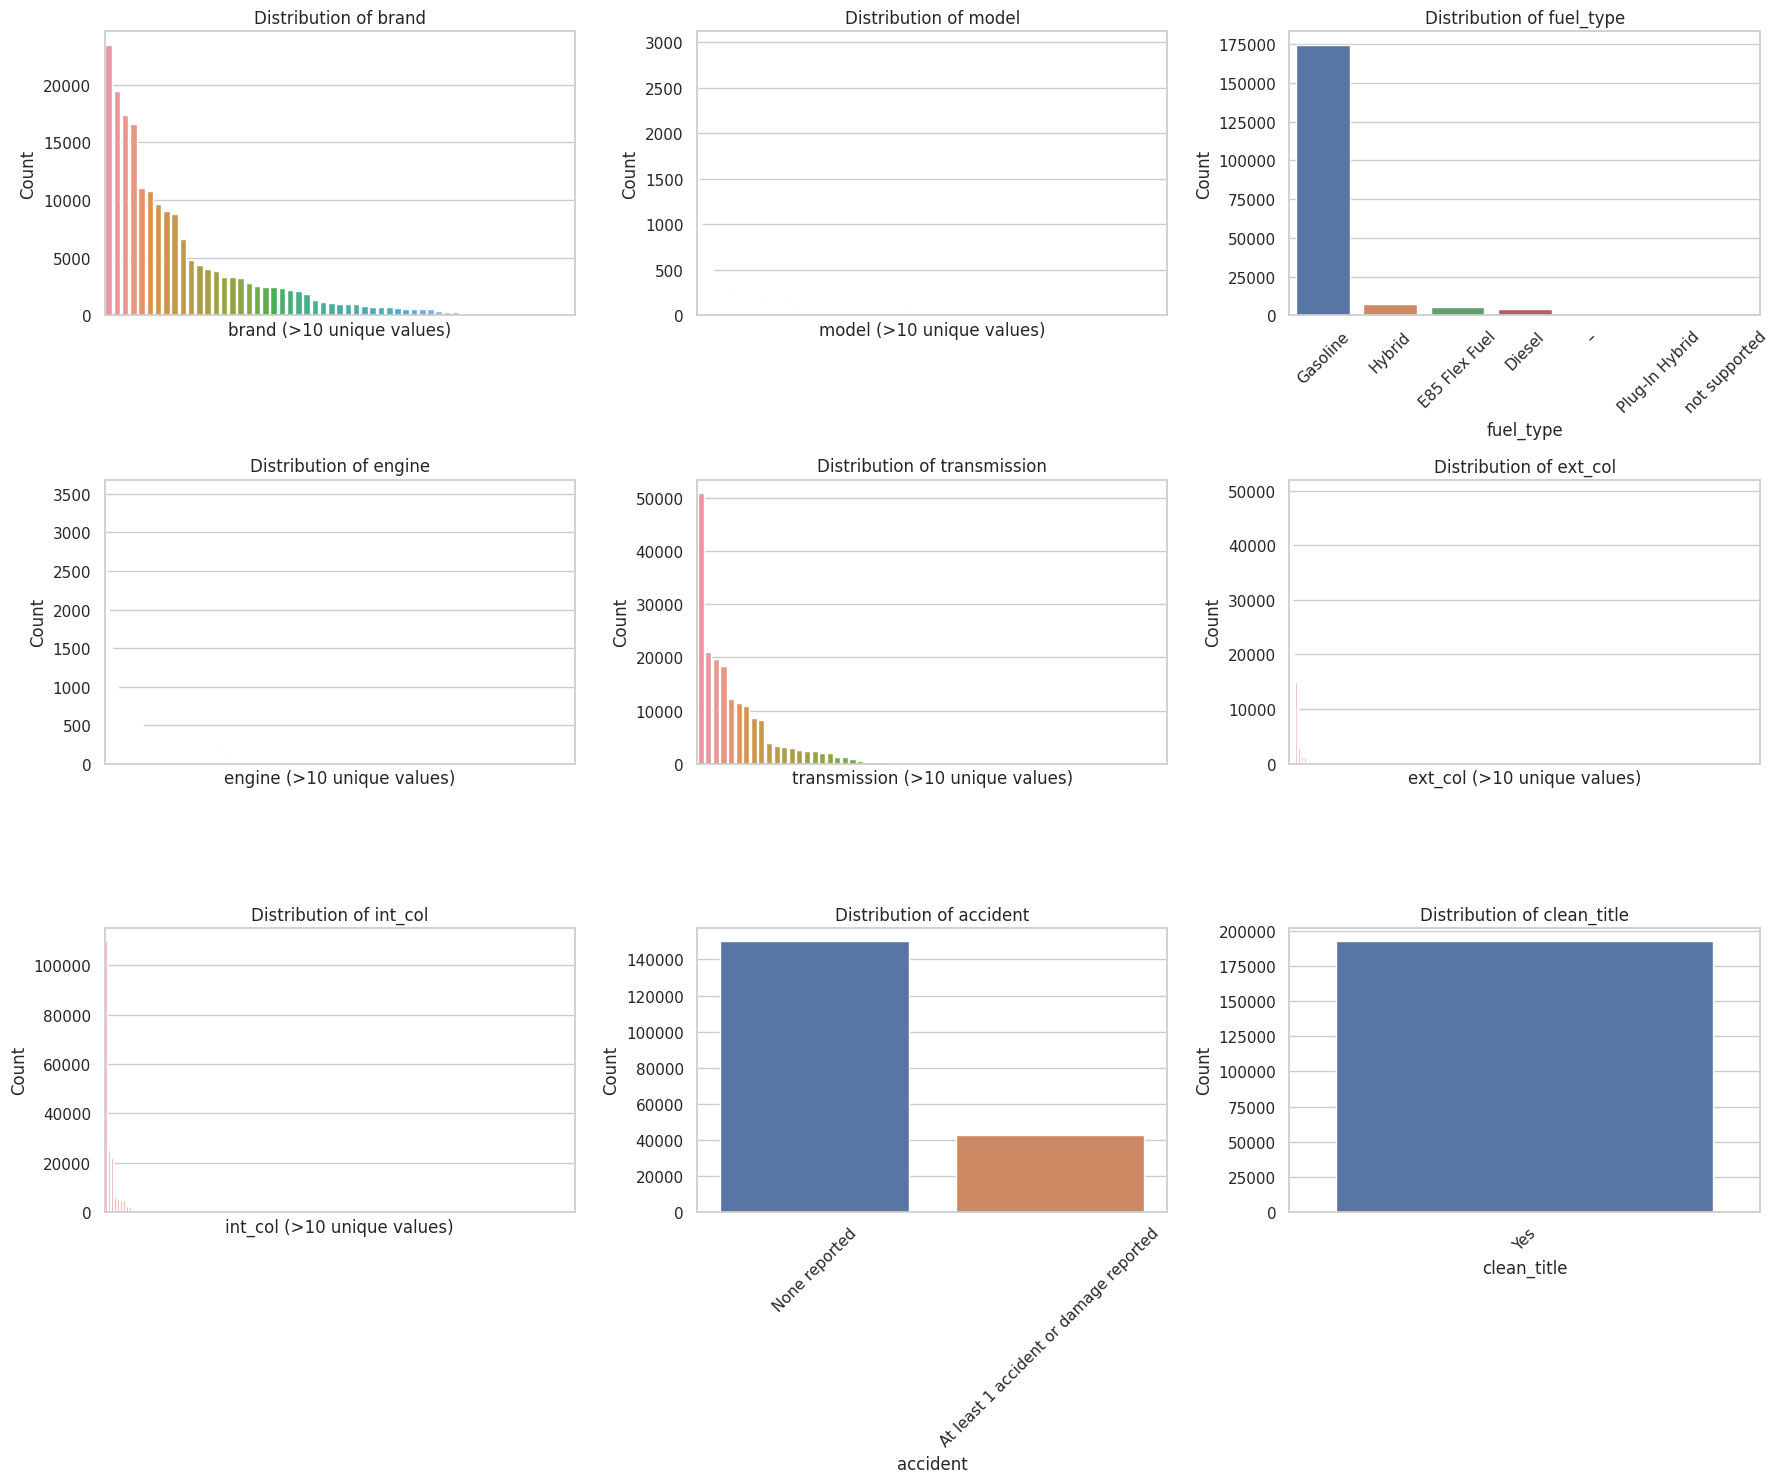

In [22]:
#Plotting Histograms for Categorical Columns

def Plot_Categorical_Distributions(data, n_cols=3):
    Categorical_Col = data.select_dtypes(include=['object']).columns.tolist()

    n_rows = int(np.ceil(len(Categorical_Col) / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
    axes = axes.flatten()
    
    for idx, col in enumerate(Categorical_Col):
        value_counts = data[col].value_counts()

        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[idx])
        axes[idx].set_title(f"Distribution of {col}")
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel("Count")

        if data[col].nunique() > 10:
            axes[idx].set_xticks([])
            axes[idx].set_xlabel(f"{col} (>10 unique values)")
        else:
            axes[idx].tick_params(axis='x', rotation=45)

    for i in range(len(Categorical_Col), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

Plot_Categorical_Distributions(Train_Original)



## **Skewness Handeling**

Skewness Results:
model_year: Square Root Transformed
milage: Log Transformed
price: Log Transformed


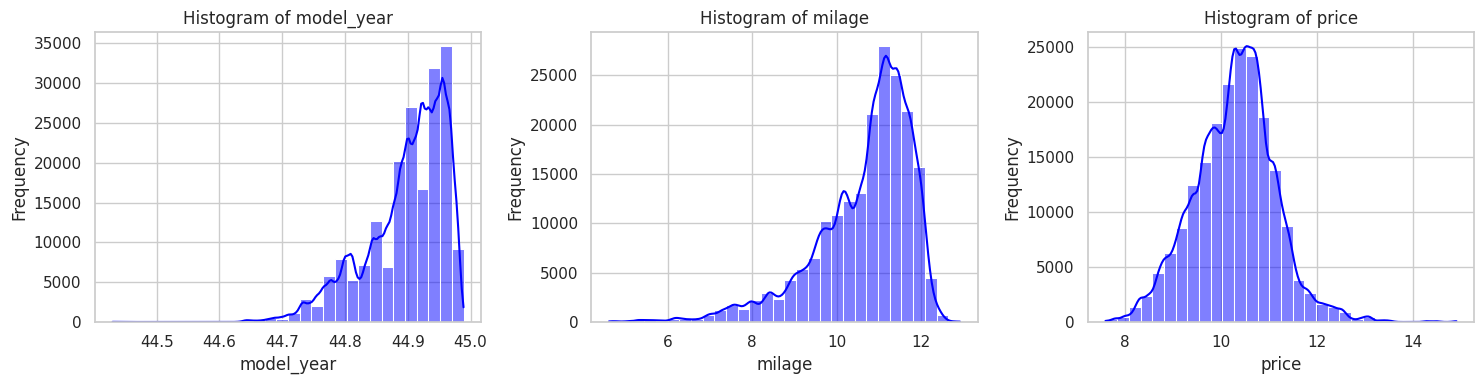

In [23]:
sns.set(style="whitegrid")

def Fix_Skewness(df, threshold=0.5):
    numerical_cols = df.select_dtypes(include=['int64']).columns
    
    Skewness_Results = {}

    for col in numerical_cols:
        Skewness = skew(df[col])
        Skewness_Results[col] = Skewness
        
        if abs(Skewness) > threshold:
            if Skewness > 0:  
                df[col] = np.log1p(df[col])   
                Skewness_Results[col] = "Log Transformed"
            else:  
                df[col] = np.sqrt(df[col])  
                Skewness_Results[col] = "Square Root Transformed"

    return df, Skewness_Results

train_original_fixed, Skewness_info = Fix_Skewness(Train_Original)

print("Skewness Results:")
for column, result in Skewness_info.items():
    print(f"{column}: {result}")

def Plot_Numerical_Data_Fixed(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    num_columns = len(numerical_cols)
    
    fig, axes = plt.subplots(1, num_columns, figsize=(5*num_columns, 4))   
    if num_columns == 1:
        axes = [axes]
    
    for ax, col in zip(axes, numerical_cols):
        sns.histplot(df[col], kde=True, bins=30, color='blue', ax=ax)
        ax.set_title(f'Histogram of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

    plt.tight_layout()   
    plt.show()

Plot_Numerical_Data_Fixed(train_original_fixed)


# **Data Preprocessing**